<a href="https://colab.research.google.com/github/elenaajayi/Computer-Vision-Fundamentals---CUS-754/blob/main/ProblemSet_04/Problem_Set_04_EdgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is part the of Dr. Christoforos Christoforou's course materials. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials or any of their derivatives without the instructor's express written consent.

# Problem Set 04 - Edge Detections
**Professor:** Dr. Christoforos Christoforou


## Exercise 1
Edge detection is one of the most important operations in Computer Vision. In this exercise we will investigate how it can be performed and what information can be obtained from it.

One of the ways to detect edges is to compute image intensity gradients. They can be approximated by convolving image with Sobel filters. They consist of 2 $3 \times 3$ filters:

\begin{equation*}
S_x = \frac{1}{8}
\begin{bmatrix}
-1 & 0 & +1\\
-2 & 0 & +2\\
-1 & 0 & +1\\
\end{bmatrix}
\hspace{2cm}
S_y = \frac{1}{8}
\begin{bmatrix}
-1 & -2 & -1\\
0 & 0 & 0\\
+1 & +2 & +1\\
\end{bmatrix}
\end{equation*}

where $S_x$ computes the partial derivative of the image in the horizontal direction, while $S_y$ does it in the vertical direction.


**Exercise 1.1:**
* Load an image and convert it to gray scale (i.e. using the ```cv.cvtColor``` functions with `cv.COLOR_BGR2GRAY`) .

* Compute the image derivatives in x- and y-directions using Sobel filters. You can do that in a couple of ways.  One appoach is to use the function ```python cv2.Sobel()``` from openCV library.  A second appoach, you can define the sobel kernel manually (i.e. as a 2D array, one kernel for X and one kernel for Y) and use the  ```python cv.filter2D``` method to convolve the image with each of the two sobel kernel. For this task you are expected to compuer the derivatives in x- and y-directions using both approches.


* Visualize the image gradients. How can you explain the differences between the two results?

In [ ]:
#
# Load an image from the following URL and convert it into gray scale.
#  url1 = 'https://gray-kalb-prod.cdn.arcpublishing.com/resizer/ZEfu9gsAgnX7p95ZECl6vgRIv8M=/1200x675/smart/cloudfront-us-east-1.images.arcpublishing.com/gray/TFRH56MPINB3RJ23IDIAILPMOE.png'
#  url2: https://news.northeastern.edu/wp-content/uploads/2020/07/071420_MM_Coins_1400.jpg#

url = 'https://gray-kalb-prod.cdn.arcpublishing.com/resizer/ZEfu9gsAgnX7p95ZECl6vgRIv8M=/1200x675/smart/cloudfront-us-east-1.images.arcpublishing.com/gray/TFRH56MPINB3RJ23IDIAILPMOE.png'

In [11]:
#import necessary libraries
import cv2
import numpy as np
import urllib.request

def url_to_image(url):
    """
    Downloads an image from a URL and converts it to an OpenCV image.

    Args:
        url (str): The URL of the image to download.

    Returns:
        numpy.ndarray: The downloaded image as an OpenCV image (NumPy array).
    """
    # Download the image data
    with urllib.request.urlopen(url) as resp:
        image_data = resp.read()

    # Convert the image data to a NumPy array
    image_np = np.array(bytearray(image_data), dtype=np.uint8)

    # Decode the image using OpenCV
    image = cv2.imdecode(image_np, -1)  # Use -1 to ensure auto-detection of image format
    return image


#Loading images
url_1 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Adeline_Ravoux%2C_by_Vincent_van_Gogh%2C_Cleveland_Museum_of_Art%2C_1958.31.jpg/1920px-Adeline_Ravoux%2C_by_Vincent_van_Gogh%2C_Cleveland_Museum_of_Art%2C_1958.31.jpg,_1958.31.jpg'
url_2 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Romaine_Lacaux%2C_by_Pierre-Auguste_Renoir%2C_Cleveland_Museum_of_Art%2C_1942.1065.jpg/1280px-Romaine_Lacaux%2C_by_Pierre-Auguste_Renoir%2C_Cleveland_Museum_of_Art%2C_1942.1065.jpg'


#use url_to_image_function
url_img_1 = url_to_image(url_1)
url_img_2 = url_to_image(url_2)


#grayscale
gray_img_1 = cv2.cvtColor(url_img_1, cv2.COLOR_BGR2GRAY)
gray_img_2 = cv2.cvtColor(url_img_2, cv2.COLOR_BGR2GRAY)


#print grayscale images
print(gray_img_1)
print(gray_img_2)


[[167 162 176 ... 167 147 112]
 [154 143 121 ... 151 128 112]
 [164 108 158 ... 161 133 130]
 ...
 [ 85  73  93 ...  61  62  71]
 [ 80  81  81 ...  64  67  79]
 [ 69  72  75 ...  60  66  84]]
[[154 160 133 ...  63  74  77]
 [143 149 114 ...  55  46  68]
 [136 153 149 ...  53  68  57]
 ...
 [ 54  70  70 ...  67  60  64]
 [ 68  54  46 ...  53  52  53]
 [ 60  57  58 ...  53  63  62]]


In [10]:

# Calculate the image derivatives in x- and y-direction using the cv.Sobel method

#gray_img_1
sobelx = cv2.Sobel(gray_img_1, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_img_1, cv2.CV_64F, 0, 1, ksize=5)


#gray_img_2
sobelx = cv2.Sobel(gray_img_2, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_img_2, cv2.CV_64F, 0, 1, ksize=5)



In [ ]:
#
# Visualize the image gradients calculated using the cv.Sobel approach.

import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')


plt.subplot(1, 2, 2)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')

plt.show()

plt.subplot(1, 2, 2)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')

plt.show()



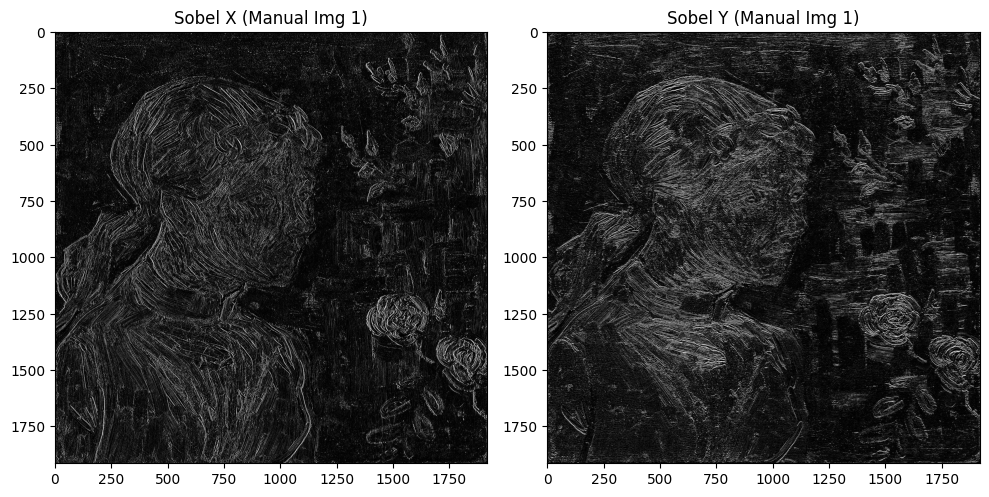

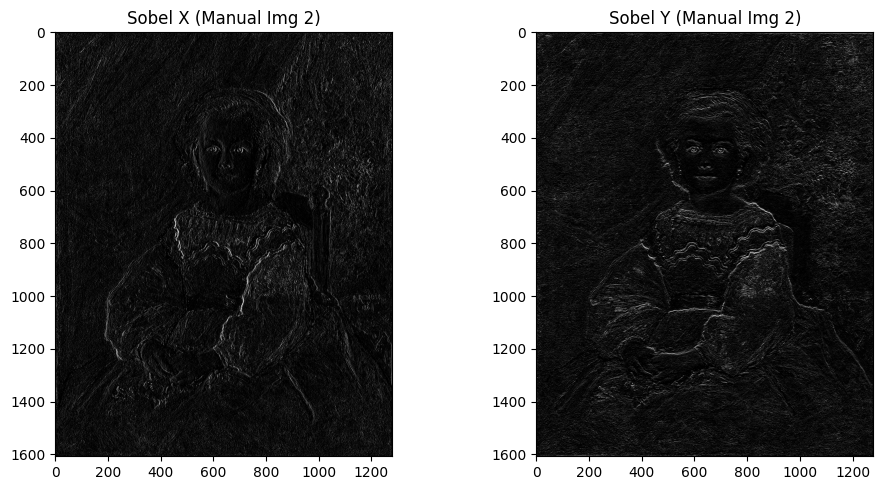

In [16]:
#
# Calculate the image derivatives in x- and y-direction using manually designed sobel kernels and the cv.filter2D method
#

import cv2
import numpy as np
import matplotlib.pyplot as plt

#define sobel kernels
sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

#apply sobel filters using cv.filter2D for Img 1
sobel_x_manual_img1 = cv2.filter2D(gray_img_1, -1, sobel_x_kernel) # x-derivate
sobel_y_manual_img1 = cv2.filter2D(gray_img_1, -1, sobel_y_kernel) # y-derivate

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(sobel_x_manual_img1, cmap='gray')
plt.title('Sobel X (Manual Img 1)')

plt.subplot(1, 2, 2)
plt.imshow(sobel_y_manual_img1, cmap='gray')
plt.title('Sobel Y (Manual Img 1)')

plt.tight_layout()
plt.show()

#define sobel kernels
sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

#apply sobel filters using cv.filter2D for Img 2
sobel_x_manual_img2 = cv2.filter2D(gray_img_2, -1, sobel_x_kernel) # x-derivate
sobel_y_manual_img2 = cv2.filter2D(gray_img_2, -1, sobel_y_kernel) # y-derivate



plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(sobel_x_manual_img2, cmap='gray')
plt.title('Sobel X (Manual Img 2)')

plt.subplot(1, 2, 2)
plt.imshow(sobel_y_manual_img2, cmap='gray')
plt.title('Sobel Y (Manual Img 2)')

plt.tight_layout()
plt.show()



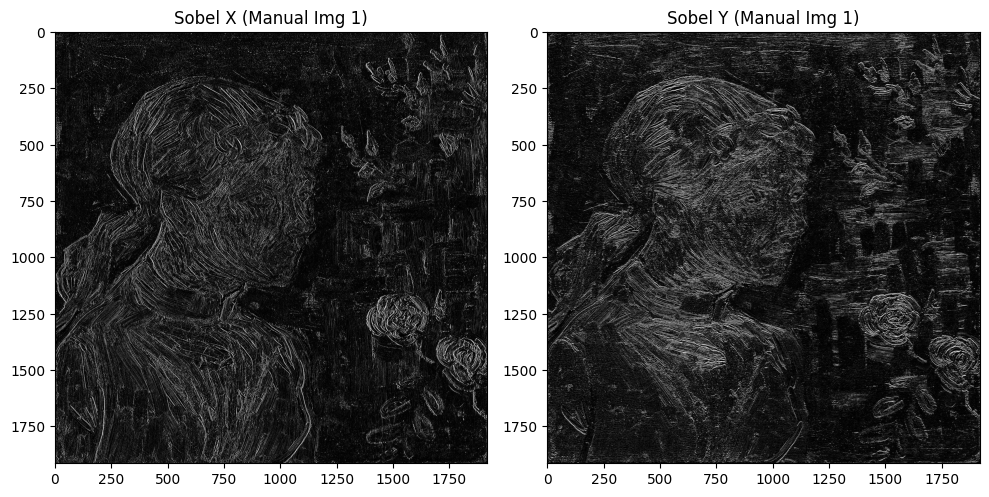

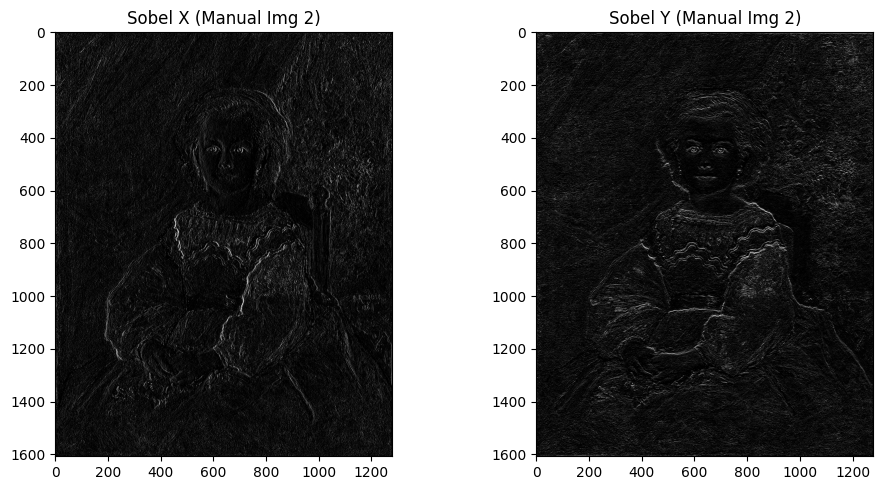

In [21]:
#
# Visualize the image gradients calculated using the cv.filter2D approach.


import matplotlib.pyplot as plt



#for Image 1
#create a figure to display the derivatives for image 1.
plt.figure(figsize=(10, 5))  # Adjust figure size if needed (width, height) in inches.

#create a subplot within the figure to display the x-derivative.
#the subplot grid has 1 row and 2 columns, and this is the first subplot (index 1).
plt.subplot(1, 2, 1)
#display the x-derivative image (`sobel_x_manual_img1`) using a grayscale colormap.
plt.imshow(sobel_x_manual_img1, cmap='gray')
#set the title of the subplot to 'Sobel X (Manual Img 1)'.
plt.title('Sobel X (Manual Img 1)')

#create a subplot within the figure to display the y-derivative.
#the subplot grid has 1 row and 2 columns, and this is the second subplot (index 2).
plt.subplot(1, 2, 2)
#display the y-derivative image (`sobel_y_manual_img1`) using a grayscale colormap.
plt.imshow(sobel_y_manual_img1, cmap='gray')
#set the title of the subplot to 'Sobel Y (Manual Img 1)'.
plt.title('Sobel Y (Manual Img 1)')

#adjust the spacing between subplots to prevent overlapping.
plt.tight_layout()
#show the figure containing the two subplots (x-derivative and y-derivative for image 1).
plt.show()

#for Image 2
#same processs as above but for image 2
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sobel_x_manual_img2, cmap='gray')
plt.title('Sobel X (Manual Img 2)')
plt.subplot(1, 2, 2)
plt.imshow(sobel_y_manual_img2, cmap='gray')
plt.title('Sobel Y (Manual Img 2)')
plt.tight_layout()
plt.show()

Mathematically, the goal of the filters $S_x$ and $S_y$ is to approximate the derivatives of the image with respect to the horizontal and vertical directions respectively, such that
\begin{equation*}
\nabla I_x(x,y) = (I*S_x)[x,y]
\quad\mathrm{and}\quad
\nabla I_y(x,y) = (I*S_y)[x,y]
\end{equation*}

Therefore, the gradient of an image at each point is a 2D vector
\begin{equation*}
\nabla I =
\begin{bmatrix}
\nabla I_x\\
\nabla I_y
\end{bmatrix}
\end{equation*}

This vector can be computed for every pixel. Its magnitude and phase (i.e. angle)  can be computed as
\begin{equation*}
|| \nabla I || = \sqrt{(\nabla I_x)^2 + (\nabla I_y)^2} \\
\angle \nabla I = atan2(\nabla I_x, \nabla I_y)
\end{equation*}

$\it{Note:}$ we use atan2() instead of atan() to be able to determine the right quadrant of the phase.


**Exercise 1.2**
* Using the previously computed image gradients and the above formula compute the gradient magnitude and gradient phase. You can use the numpy functions `np.sqrt', `np.power` and `np.arctan2`.

* Visualize the **gradient magnitude** and **phase** images along with the **original image**. Plot all three images in a single row using the subplot function. Where does the gradient have high magnitude? How does the phase change along the coin border?



In [23]:
#
#  Use this cell to calculate the magnitute and angle of the gradients calculated in exercise 1

# for image 1
#calculate the gradient magnitude for image 1 using the formula:
# magnitude = sqrt(sobel_x^2 + sobel_y^2)
gradient_magnitude_img1 = np.sqrt(np.power(sobel_x_manual_img1, 2) + np.power(sobel_y_manual_img1, 2))
#calculate the gradient phase (angle) for image 1 using the arctan2 function:
# phase = arctan2(sobel_y, sobel_x)
gradient_phase_img1 = np.arctan2(sobel_y_manual_img1, sobel_x_manual_img1)


# for image 2
#using the same formula above
gradient_magnitude_img2 = np.sqrt(np.power(sobel_x_manual_img2, 2) + np.power(sobel_y_manual_img2, 2))
# using the same formula above
gradient_phase_img2 = np.arctan2(sobel_y_manual_img2, sobel_x_manual_img2)



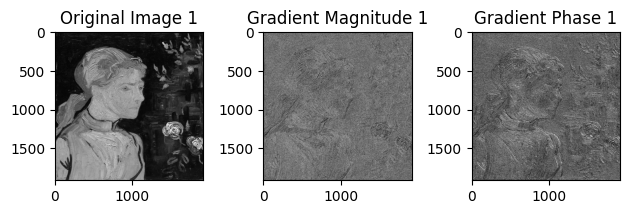

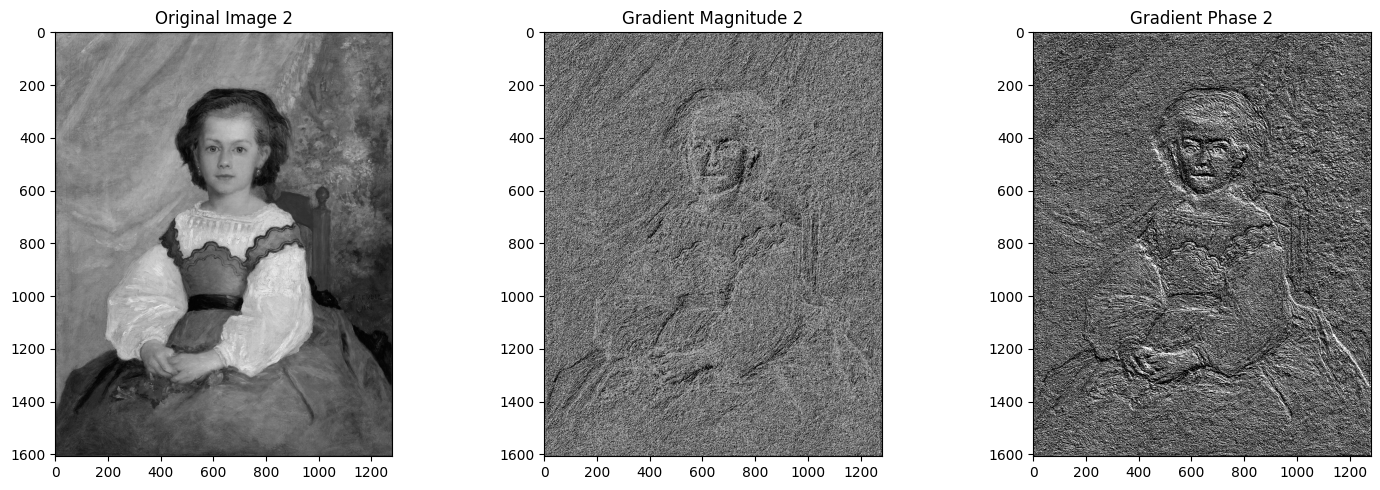

In [24]:
#
# Visualize the gradient magnitute, phase and original image.
#



#visualize img 1
#Create a subplot within the figure to display the original grayscale image.
# the subplot grid has 1 row and 3 columns, and this is the first subplot (index 1).
plt.subplot(1, 3, 1)
# display the original grayscale image (`gray_img_1`) using a grayscale colormap.
plt.imshow(gray_img_1, cmap='gray')
# set the title of the subplot to 'Original Image 1'.
plt.title('Original Image 1')

#create a subplot within the figure to display the gradient magnitude.
#the subplot grid has 1 row and 3 columns, and this is the second subplot (index 2).
plt.subplot(1, 3, 2)
# display the gradient magnitude image (`gradient_magnitude_img1`) using a grayscale colormap.
plt.imshow(gradient_magnitude_img1, cmap='gray')
# set the title of the subplot to 'Gradient Magnitude 1'.
plt.title('Gradient Magnitude 1')

# create a subplot within the figure to display the gradient phase.
# the subplot grid has 1 row and 3 columns, and this is the third subplot (index 3).
plt.subplot(1, 3, 3)
# display the gradient phase image (`gradient_phase_img1`) using a grayscale colormap.
plt.imshow(gradient_phase_img1, cmap='gray')
# set the title of the subplot to 'Gradient Phase 1'.
plt.title('Gradient Phase 1')

#adjust the spacing between subplots to prevent overlapping.
plt.tight_layout()
# show the figure containing the three subplots (original image, gradient magnitude, and gradient phase for image 1).
plt.show()

# for image 2
# same process for img 1
# gradient magnitude for img2 already calculated
plt.figure(figsize=(15, 5))  # Create a new figure for image 2.
plt.subplot(1, 3, 1)
plt.imshow(gray_img_2, cmap='gray')
plt.title('Original Image 2')
plt.subplot(1, 3, 2)
plt.imshow(gradient_magnitude_img2, cmap='gray')
plt.title('Gradient Magnitude 2')
plt.subplot(1, 3, 3)
plt.imshow(gradient_phase_img2, cmap='gray')
plt.title('Gradient Phase 2')
plt.tight_layout()
plt.show()

**Respond to the questions** : Where does the gradient have high magnitude? How does the phase change along the coin border?

Your Response here:

## Exercise 2 Laplacian of Gaussian opertator

An alternative way to detect image is to use the Laplacian operator. The opertor is calculated as the sum of the second partial derivatives along the x and y axis. To reduce the noise in the image, it is important that you first filter the image using a gaussian filter.  The operator is defined for an image f as:

$$\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$$

The operator is implemented in the openCV libary in the function `cv.Laplacian`

**Execise 2.1**
* Load an image, apply a graussina filter to reduce the noise (i.e. using the cv.GaussianBlur functions) and apply the laplacian operator.

* Visualize the origianl image and the Laplacian.

You can use the following tutorial as a [reference](https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html).


In [36]:
#
#load, filter, and generate the laplacian of the input image.
#

#import necessary libraries
import cv2
import numpy as np
import urllib.request

#compute the Laplacian of both images with proper dtype and absolute conversion
laplacian_img1 = cv2.Laplacian(gray_img_1, cv2.CV_64F)  # Compute Laplacian in 64-bit float
laplacian_img1 = cv2.convertScaleAbs(laplacian_img1)  # Convert to 8-bit absolute values

laplacian_img2 = cv2.Laplacian(gray_img_2, cv2.CV_64F)
laplacian_img2 = cv2.convertScaleAbs(laplacian_img2)

#print min-max values to check contrast range
print("Laplacian Image 1 - Min:", laplacian_img1.min(), "Max:", laplacian_img1.max())
print("Laplacian Image 2 - Min:", laplacian_img2.min(), "Max:", laplacian_img2.max())



Laplacian Image 1 - Min: 0 Max: 255
Laplacian Image 2 - Min: 0 Max: 255


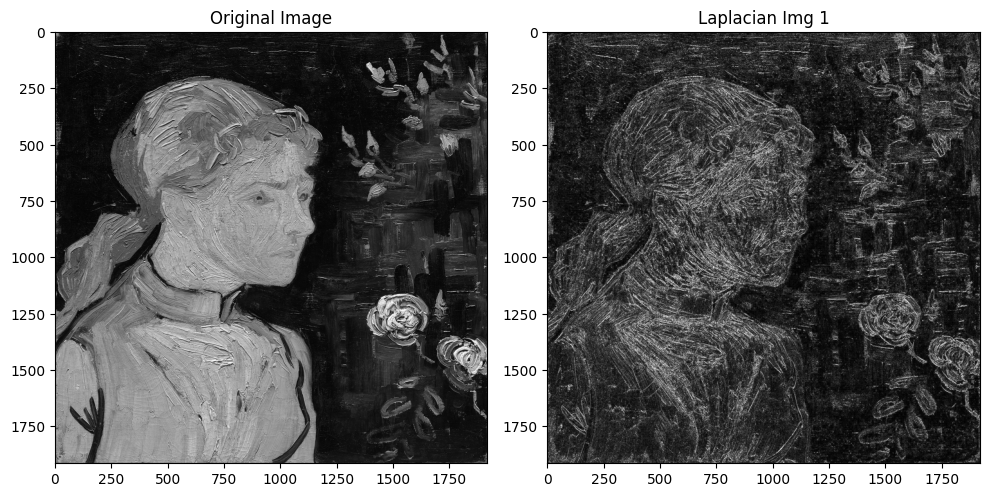

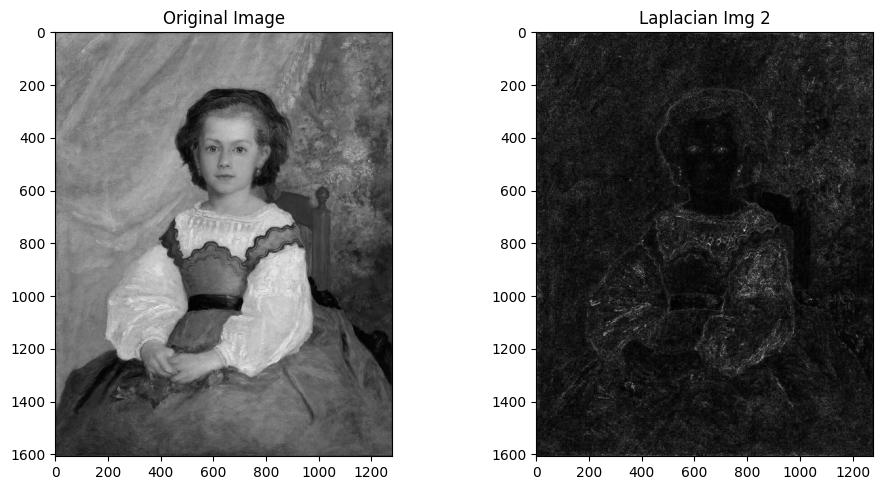

In [37]:

#visualize the original and Laplacian images
plt.figure(figsize=(10, 5))

#display first image
plt.subplot(1, 2, 1)
plt.imshow(gray_img_1, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_img1, cmap='gray', vmin=0, vmax=255)
plt.title('Laplacian Img 1')

plt.tight_layout()
plt.show()

#display second image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_img_2, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_img2, cmap='gray', vmin=0, vmax=255)
plt.title('Laplacian Img 2')

plt.tight_layout()
plt.show()



Copyright Statement: Copyright © 2020 Christoforou. The materials provided by the instructor of this course, including this notebook, are for the use of the students enrolled in the course. Materials are presented in an educational context for personal use and study and should not be shared, distributed, disseminated or sold in print — or digitally — outside the course without permission. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials as well as any of their derivatives without the instructor's express written consent.